In [1]:
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import shapefile
import pandas as pd


In [ ]:
fig, ax = plt.subplots(figsize=(36, 20)) 
# make sure the value of resolution is a lowercase L,
#  for 'low', not a numeral 1
my_map = Basemap(projection='mill', llcrnrlon=-130, llcrnrlat=15, urcrnrlon=-64, urcrnrlat=52,
               resolution='h')
 
my_map.drawcoastlines()
my_map.drawcountries()
#my_map.fillcontinents(color='tan', lake_color='blue')
#my_map.drawlsmask(land_color='tan',ocean_color='blue')
#my_map.bluemarble()
my_map.shadedrelief()

my_map.drawparallels(np.arange(-90, 90, 30))
my_map.drawmeridians(np.arange(0,360,30))
my_map.drawstates()
my_map.drawrivers()
# 43.3033° N, 91.7857° W
x,y = my_map(-91.7857, 43.3033)
print(x,y)
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'bold',
        'size': 20,
        }
my_map.plot(x, y, 'bo', markersize=10)
plt.text(x,y,'You are \nHere',fontdict=font)
plt.show()

### Zooming in

Set values for llcrnlon, llcrnlat, urcrnlon and urcnlat



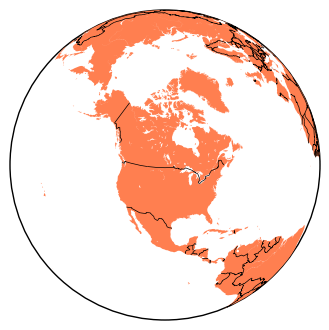

In [10]:
my_map = Basemap(projection='ortho', lat_0=50, lon_0=-100,
              resolution='l')
 
#my_map.drawcoastlines()
my_map.drawcountries()

my_map.fillcontinents(color='coral')

plt.show()

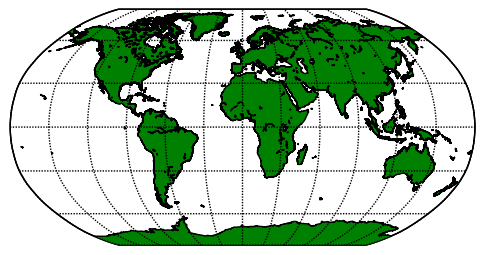

In [18]:
my_map = Basemap(projection='robin', lat_0=0, lon_0=0,
              resolution='h', area_thresh=1000.0)
 
my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color='green')
my_map.drawmapboundary()

my_map.drawmeridians(np.arange(0, 360, 30))
my_map.drawparallels(np.arange(-90, 90, 30))
 
plt.show()

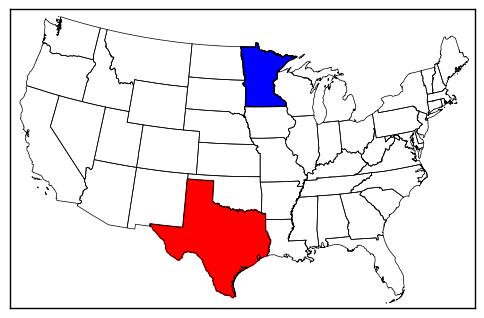

In [17]:
from matplotlib.patches import Polygon

# create the map
map = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

# load the shapefile, use the name 'states'
map.readshapefile('/home/faculty/millbr02/pub/st99_d00', name='states', drawbounds=True)

# collect the state names from the shapefile attributes so we can
# look up the shape obect for a state by it's name
state_names = []
for shape_dict in map.states_info:
    state_names.append(shape_dict['NAME'])

ax = plt.gca() # get current axes instance

# get Texas and draw the filled polygon
seg = map.states[state_names.index('Texas')]
poly = Polygon(seg, facecolor='red',edgecolor='red')
ax.add_patch(poly)
seg = map.states[state_names.index('Minnesota')]
poly = Polygon(seg, facecolor='blue')
ax.add_patch(poly)

plt.show()

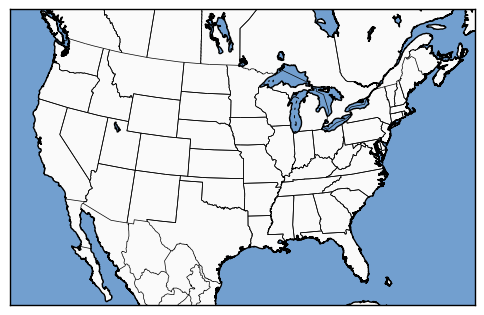

In [28]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

def draw_map_background(m, ax):
    ax.set_axis_bgcolor('#729FCF')
    m.fillcontinents(color='#FAFAFA', ax=ax, zorder=0)
    m.drawcounties(ax=ax)
    m.drawstates(ax=ax)
    m.drawcountries(ax=ax)
    m.drawcoastlines(ax=ax)
KM = 1000.
clat = 39.3
clon = -94.7333
wid = 5500 * KM
hgt = 3500 * KM
m = Basemap(width=wid, height=hgt, rsphere=(6378137.00,6356752.3142),
            resolution='i', area_thresh=2500., projection='lcc',
            lat_1=38.5, lat_2=38.5, lat_0=clat, lon_0=clon)
fig = plt.figure()
ax = fig.add_subplot(111)
draw_map_background(m, ax)
plt.show()

In [6]:
r = shapefile.Reader('/home/faculty/millbr02/pub/gadm28/gadm28')
#shapes = r.shapes()
#records = r.records()


In [7]:
shapes = r.shapes()

In [5]:
records = r.records()

NameError: name 'records' is not defined

In [46]:
lons, lats = zip(*shapes[1].points)

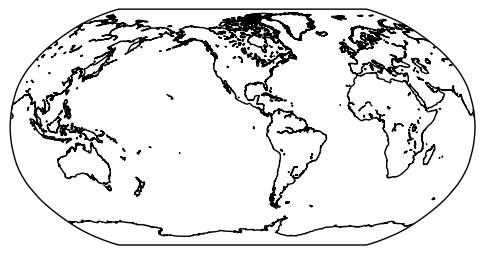

In [17]:
my_map = Basemap(projection='robin', lat_0=50, lon_0=-100,
              resolution='l')
my_map.drawcoastlines()
plt.show()

In [47]:
data = np.array(my_map(lons,lats)).T

In [48]:
segs = [data,]

In [23]:
from matplotlib.collections import LineCollection
from matplotlib import cm

In [50]:
lines = LineCollection(segs, antialiaseds=(1,))

In [51]:
lines.set_facecolors(cm.jet(0.4))

In [52]:
lines.set_linewidth(0.1)

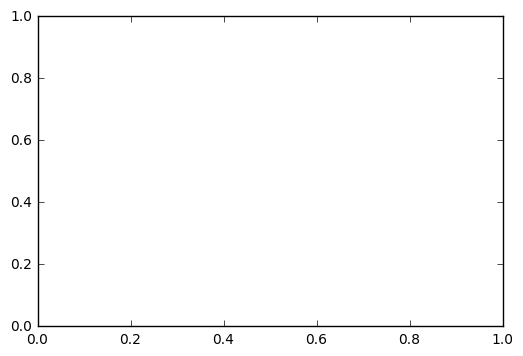

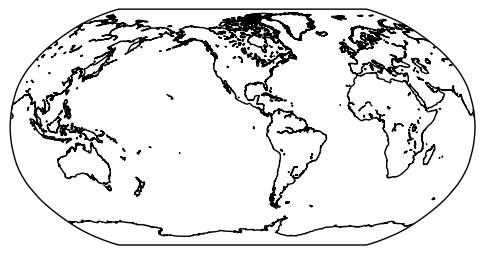

In [55]:
my_map.drawcoastlines()
fig = plt.figure(figsize=(11.7, 8.3))
ax =plt.subplot(111)
ax.add_collection(lines)
plt.show()

In [37]:
lines

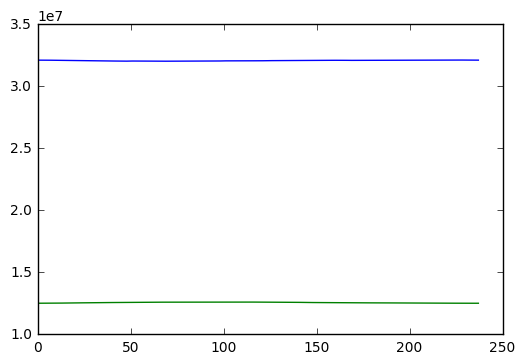

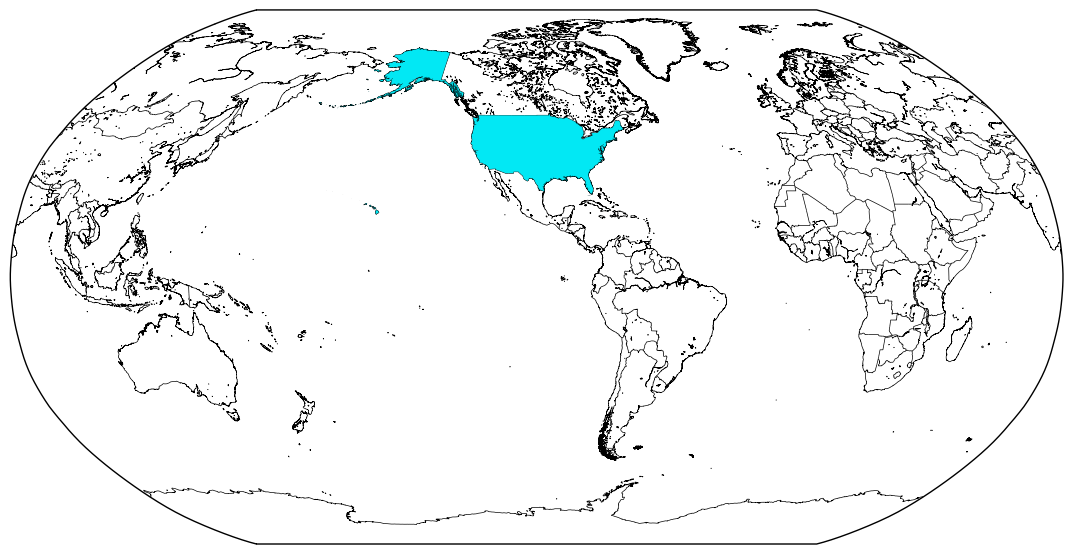

In [80]:
#
# BaseMap example by geophysique.be
# tutorial 10
 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
 
### PARAMETERS FOR MATPLOTLIB :
import matplotlib as mpl
mpl.rcParams['font.size'] = 10.
mpl.rcParams['font.family'] = 'Comic Sans MS'
mpl.rcParams['axes.labelsize'] = 8.
mpl.rcParams['xtick.labelsize'] = 6.
mpl.rcParams['ytick.labelsize'] = 6.
 
fig = plt.figure(figsize=(11.7,8.3))
#Custom adjust of the subplots
plt.subplots_adjust(left=0.05,right=0.95,top=0.90,bottom=0.05,wspace=0.15,hspace=0.05)
ax = plt.subplot(111)
#Let's create a basemap of Europe
x1 = -5.0
x2 = 15.
y1 = 45.
y2 = 54.
 
#m = Basemap(resolution='i',projection='merc', llcrnrlat=y1,urcrnrlat=y2,llcrnrlon=x1,urcrnrlon=x2,lat_ts=(x1+x2)/2)
m = Basemap(resolution='i',projection='robin', lat_0=50, lon_0=-100,)


m.drawcountries(linewidth=0.5)
m.drawcoastlines(linewidth=0.5)
#m.drawparallels(np.arange(y1,y2,2.),labels=[1,0,0,0],color='black',dashes=[1,1],labelstyle='+/-',linewidth=0.2) # draw parallels
#m.drawmeridians(np.arange(x1,x2,2.),labels=[0,0,0,1],color='black',dashes=[1,1],labelstyle='+/-',linewidth=0.2) # draw meridians
 
from matplotlib.collections import LineCollection
from matplotlib import cm
import shapefile
 
#r = shapefile.Reader(r"/home/faculty/millbr02/pub/BEL_adm3")
#shapes = r.shapes()
#records = r.records()
r = shapefile.Reader("/home/faculty/millbr02/pub/TM_WORLD_BORDERS-0.3/TM_WORLD_BORDERS-0.3.shp")
shapes = r.shapes()
records = r.records()

 
#for record, shape in zip(records,shapes):
shape = shapes[208]
lons,lats = zip(*shape.points)
data = np.array(m(lons, lats)).T

if len(shape.parts) == 1:
    segs = [data,]
else:
    segs = []
    for i in range(1,len(shape.parts)):
        index = shape.parts[i-1]
        index2 = shape.parts[i]
        segs.append(data[index:index2])
    segs.append(data[index2:])

lines = LineCollection(segs,antialiaseds=(1,))
lines.set_facecolors(cm.jet(np.random.rand(1)))
lines.set_edgecolors('k')
lines.set_linewidth(0.1)
ax.add_collection(lines)
 

plt.show()

In [68]:
r = shapefile.Reader("/home/faculty/millbr02/pub/TM_WORLD_BORDERS-0.3/TM_WORLD_BORDERS-0.3.shp")
shapes = r.shapes()
records = r.records()


In [77]:
[x[4] for x in records].index("United States")



208

In [82]:
ctry_map = { k[2]:i for i,k in enumerate(records)}


In [14]:
cinfo = pd.read_csv('Indicators.csv')

In [89]:
cinfo.head(20)
#

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06
5,Arab World,ARB,Arms imports (SIPRI trend indicator values),MS.MIL.MPRT.KD,1960,5.380000e+08
6,Arab World,ARB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,4.769789e+01
7,Arab World,ARB,CO2 emissions (kt),EN.ATM.CO2E.KT,1960,5.956399e+04
8,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,6.439635e-01
9,Arab World,ARB,CO2 emissions from gaseous fuel consumption (%...,EN.ATM.CO2E.GF.ZS,1960,5.041292e+00


In [21]:
telephone = cinfo[(cinfo.Year==2000) & (cinfo.IndicatorCode == 'IT.MLT.MAIN.P2')]

In [22]:
telephone['vnormal'] = telephone.Value.map(lambda x : x / telephone.Value.max())

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [23]:
telephone.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value,vnormal
3171124,Arab World,ARB,Fixed telephone subscriptions (per 100 people),IT.MLT.MAIN.P2,2000,6.982061,0.074741
3171555,Caribbean small states,CSS,Fixed telephone subscriptions (per 100 people),IT.MLT.MAIN.P2,2000,22.041652,0.235950
3172020,Central Europe and the Baltics,CEB,Fixed telephone subscriptions (per 100 people),IT.MLT.MAIN.P2,2000,29.589179,0.316744
3172571,East Asia & Pacific (all income levels),EAS,Fixed telephone subscriptions (per 100 people),IT.MLT.MAIN.P2,2000,13.931154,0.149129
3173136,East Asia & Pacific (developing only),EAP,Fixed telephone subscriptions (per 100 people),IT.MLT.MAIN.P2,2000,9.195172,0.098432


In [101]:
telephone.set_index('CountryCode',inplace=True)
telephone.head()

,CountryName,IndicatorName,IndicatorCode,Year,Value,vnormal
CountryCode,,,,,,
ARB,Arab World,Fixed telephone subscriptions,IT.MLT.MAIN,2000,19847314.0,0.020356
CSS,Caribbean small states,Fixed telephone subscriptions,IT.MLT.MAIN,2000,1416002.0,0.001452
CEB,Central Europe and the Baltics,Fixed telephone subscriptions,IT.MLT.MAIN,2000,32046150.0,0.032867
EAS,East Asia & Pacific (all income levels),Fixed telephone subscriptions,IT.MLT.MAIN,2000,287159622.0,0.294517
EAP,East Asia & Pacific (developing only),Fixed telephone subscriptions,IT.MLT.MAIN,2000,168487101.0,0.172804


In [103]:
[x for x in telephone.index]

['ARB',
 'CSS',
 'CEB',
 'EAS',
 'EAP',
 'EMU',
 'ECS',
 'ECA',
 'EUU',
 'FCS',
 'HPC',
 'HIC',
 'NOC',
 'OEC',
 'LCN',
 'LAC',
 'LDC',
 'LMY',
 'LIC',
 'LMC',
 'MEA',
 'MNA',
 'MIC',
 'NAC',
 'OED',
 'OSS',
 'PSS',
 'SST',
 'SAS',
 'SSF',
 'SSA',
 'UMC',
 'WLD',
 'AFG',
 'ALB',
 'DZA',
 'ASM',
 'ADO',
 'AGO',
 'ATG',
 'ARG',
 'ARM',
 'ABW',
 'AUS',
 'AUT',
 'AZE',
 'BHS',
 'BHR',
 'BGD',
 'BRB',
 'BLR',
 'BEL',
 'BLZ',
 'BEN',
 'BMU',
 'BTN',
 'BOL',
 'BIH',
 'BWA',
 'BRA',
 'BRN',
 'BGR',
 'BFA',
 'BDI',
 'CPV',
 'KHM',
 'CMR',
 'CAN',
 'CYM',
 'CAF',
 'TCD',
 'CHL',
 'CHN',
 'COL',
 'COM',
 'ZAR',
 'COG',
 'CRI',
 'CIV',
 'HRV',
 'CUB',
 'CYP',
 'CZE',
 'DNK',
 'DJI',
 'DMA',
 'DOM',
 'ECU',
 'EGY',
 'SLV',
 'GNQ',
 'ERI',
 'EST',
 'ETH',
 'FRO',
 'FJI',
 'FIN',
 'FRA',
 'PYF',
 'GAB',
 'GMB',
 'GEO',
 'DEU',
 'GHA',
 'GRC',
 'GRL',
 'GRD',
 'GUM',
 'GTM',
 'GIN',
 'GNB',
 'GUY',
 'HTI',
 'HND',
 'HKG',
 'HUN',
 'ISL',
 'IND',
 'IDN',
 'IRN',
 'IRQ',
 'IRL',
 'ISR',
 'ITA',
 'JAM',


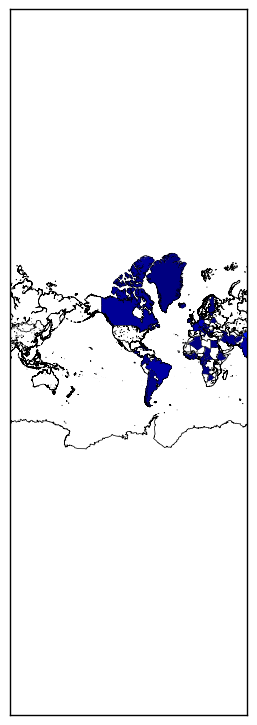

In [118]:
fig = plt.figure(figsize=(11.7,8.3))
#Custom adjust of the subplots
plt.subplots_adjust(left=0.05,right=0.95,top=0.90,bottom=0.05,wspace=0.15,hspace=0.05)
ax = plt.subplot(111)
#Let's create a basemap of Europe
x1 = -5.0
x2 = 15.
y1 = 45.
y2 = 54.
 
#m = Basemap(resolution='i',projection='merc', llcrnrlat=y1,urcrnrlat=y2,llcrnrlon=x1,urcrnrlon=x2,lat_ts=(x1+x2)/2)
m = Basemap(resolution='i',projection='merc', lat_0=50, lon_0=-100,)


m.drawcountries(linewidth=0.5)
m.drawcoastlines(linewidth=0.5)
#m.drawparallels(np.arange(y1,y2,2.),labels=[1,0,0,0],color='black',dashes=[1,1],labelstyle='+/-',linewidth=0.2) # draw parallels
#m.drawmeridians(np.arange(x1,x2,2.),labels=[0,0,0,1],color='black',dashes=[1,1],labelstyle='+/-',linewidth=0.2) # draw meridians
 
from matplotlib.collections import LineCollection
from matplotlib import cm
import shapefile
 
#r = shapefile.Reader(r"/home/faculty/millbr02/pub/BEL_adm3")
#shapes = r.shapes()
#records = r.records()
#r = shapefile.Reader("/home/faculty/millbr02/pub/TM_WORLD_BORDERS-0.3/TM_WORLD_BORDERS-0.3.shp")
#shapes = r.shapes()
#records = r.records()

 
for country in [x for x in telephone.index if x in ctry_map][:90]:
    shape = shapes[ctry_map[country]]
    lons,lats = zip(*shape.points)
    data = np.array(m(lons, lats)).T

    if len(shape.parts) == 1:
        segs = [data,]
    else:
        segs = []
        for i in range(1,len(shape.parts)):
            index = shape.parts[i-1]
            index2 = shape.parts[i]
            segs.append(data[index:index2])
        segs.append(data[index2:])

    lines = LineCollection(segs,antialiaseds=(1,))
    lines.set_facecolors(cm.jet(telephone.ix[country].vnormal))
    lines.set_edgecolors('k')
    lines.set_linewidth(0.1)
    ax.add_collection(lines)
 

plt.show()

In [26]:
import plotly.offline as py
import pandas as pd

py.offline.init_notebook_mode()

In [32]:

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')

data = [ dict(
        type = 'choropleth',
        locations = telephone.CountryCode, #df['CODE'],
        z = telephone.Value, #df['GDP (BILLIONS)'],
        text = telephone.CountryName, #df['COUNTRY'],
        colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
        autocolorscale = True,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = True,
            tickprefix = '$',
            title = 'Installed Land Lines'),
      ) ]

layout = dict(
    title = '2014 Global GDP<br>Source:\
            <a href="https://www.cia.gov/library/publications/the-world-factbook/fields/2195.html">\
            CIA World Factbook</a>',
    geo = dict(
        showframe = False,
        showcoastlines = True,
        showlakes = True,
        projection = dict(
            type = 'robinson'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map1' )

In [31]:
#import plotly.plotly as py
from plotly.graph_objs import *

trace0 = Scatter(
  x=[1, 2, 3, 4],
  y=[10, 15, 13, 17]
)
trace1 = Scatter(
  x=[1, 2, 3, 4],
  y=[16, 5, 11, 9]
)
data = Data([trace0, trace1])

py.iplot(data, filename = 'basic-line')

In [2]:
#py.sign_in('bnmnetp','nu3tzszyr1')

In [12]:
df['CODE']

0      AFG
1      ALB
2      DZA
3      ASM
4      AND
5      AGO
6      AIA
7      ATG
8      ARG
9      ARM
10     ABW
11     AUS
12     AUT
13     AZE
14     BHM
15     BHR
16     BGD
17     BRB
18     BLR
19     BEL
20     BLZ
21     BEN
22     BMU
23     BTN
24     BOL
25     BIH
26     BWA
27     BRA
28     VGB
29     BRN
      ... 
192    SWE
193    CHE
194    SYR
195    TWN
196    TJK
197    TZA
198    THA
199    TLS
200    TGO
201    TON
202    TTO
203    TUN
204    TUR
205    TKM
206    TUV
207    UGA
208    UKR
209    ARE
210    GBR
211    USA
212    URY
213    UZB
214    VUT
215    VEN
216    VNM
217    VGB
218    WBG
219    YEM
220    ZMB
221    ZWE
Name: CODE, dtype: object